# SOM

In [1]:
%matplotlib inline
import minisom 
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn.metrics import silhouette_score
from scipy import stats
import pickle

plt.rcParams['figure.figsize'] = [10,8]

print('Libraries sudah siap')

Libraries sudah siap


In [2]:
# filter warnings because of scikit-learns love to warnings...
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
df = pd.read_csv('DataSkripsiGempa.csv', sep = ';')

In [4]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2021-11-17T03:30:34.980Z,-3.5754,101.5892,59.84,5.00,mb,NaN,69.0,1.570,0.93,...,2022-01-22T20:51:57.040Z,"79 km WNW of Bengkulu, Indonesia",earthquake,4.2,6.5,0.072,61.0,reviewed,us,us
1,2021-11-03T00:50:35.771Z,0.9206,98.5198,64.77,5.10,mb,NaN,50.0,1.018,1.06,...,2022-01-14T17:58:55.040Z,"95 km SSW of Sibolga, Indonesia",earthquake,5.0,5.2,0.054,114.0,reviewed,us,us
2,2021-11-01T17:04:16.557Z,0.2081,96.7090,8.00,5.86,mb,NaN,17.0,1.391,1.00,...,2022-01-14T17:58:50.040Z,"253 km S of Sinabang, Indonesia",earthquake,7.2,1.7,0.047,44.0,reviewed,us,us
3,2021-10-15T23:17:27.891Z,-4.9203,102.9791,59.39,5.00,mb,NaN,50.0,0.556,0.77,...,2021-12-25T22:58:36.040Z,"103 km SSW of Pagar Alam, Indonesia",earthquake,6.7,5.9,0.066,73.0,reviewed,us,us
4,2021-10-08T10:04:53.362Z,4.4134,95.4330,61.14,5.20,mb,NaN,53.0,1.712,0.57,...,2021-12-18T19:58:38.040Z,"82 km WNW of Meulaboh, Indonesia",earthquake,7.4,5.7,0.047,153.0,reviewed,us,us


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             1457 non-null   object 
 1   latitude         1457 non-null   float64
 2   longitude        1457 non-null   float64
 3   depth            1457 non-null   float64
 4   mag              1457 non-null   float64
 5   magType          1457 non-null   object 
 6   nst              438 non-null    float64
 7   gap              874 non-null    float64
 8   dmin             200 non-null    float64
 9   rms              1290 non-null   float64
 10  net              1457 non-null   object 
 11  id               1457 non-null   object 
 12  updated          1457 non-null   object 
 13  place            1457 non-null   object 
 14  type             1457 non-null   object 
 15  horizontalError  174 non-null    float64
 16  depthError       451 non-null    float64
 17  magError      

In [6]:
df["time"]= pd.to_datetime(df["time"], errors='coerce')

In [7]:
# only keeping the columns we require
df = df[['latitude','longitude','mag','depth','place']]

In [8]:
df.dropna(axis=0, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1456
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   1457 non-null   float64
 1   longitude  1457 non-null   float64
 2   mag        1457 non-null   float64
 3   depth      1457 non-null   float64
 4   place      1457 non-null   object 
dtypes: float64(4), object(1)
memory usage: 68.3+ KB


In [10]:
gempa = df[['mag','depth']]

In [11]:
gempa.head()

,mag,depth
0,5.00,59.84
1,5.10,64.77
2,5.86,8.00
3,5.00,59.39
4,5.20,61.14


In [12]:
gempa.shape

(1457, 2)

Text(0.5, 0, 'Kedalaman (km)')

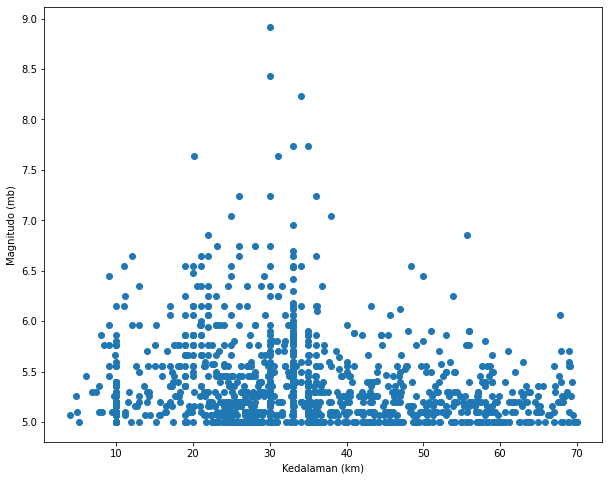

In [13]:
plt.scatter(gempa['depth'],gempa['mag'])
plt.ylabel('Magnitudo (mb)')
plt.xlabel('Kedalaman (km)')

### Scaler

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(gempa)
print(X_scaled)

[[-0.81946989  1.8621056 ]
 [-0.57976067  2.22060317]
 [ 1.24202936 -1.90757279]
 ...
 [-0.81946989 -0.08963375]
 [ 0.45098895 -0.08963375]
 [ 1.2899712  -0.08963375]]


In [15]:
scaled_df = pd.DataFrame(X_scaled, columns=gempa.columns)
scaled_df.head()

,mag,depth
0,-0.819470,1.862106
1,-0.579761,2.220603
2,1.242029,-1.907573
3,-0.819470,1.829383
4,-0.340051,1.956638


In [16]:
pd.DataFrame(X_scaled).describe()

,0,1
count,1.457000e+03,1.457000e+03
mean,-4.221438e-17,-4.032274e-16
std,1.000343e+00,1.000343e+00
min,-8.194699e-01,-2.205715e+00
25%,-6.516734e-01,-5.913849e-01
50%,-3.400515e-01,-8.963375e-02
75%,2.831925e-01,4.397501e-01
max,8.577131e+00,2.600916e+00


In [17]:
scaler2 = MinMaxScaler()
X_scaled2 = scaler2.fit_transform(gempa)
print(X_scaled2)

[[0.         0.84629349]
 [0.0255102  0.92087746]
 [0.21938776 0.06202723]
 ...
 [0.         0.44024206]
 [0.13520408 0.44024206]
 [0.2244898  0.44024206]]


In [18]:
scaled_df2 = pd.DataFrame(X_scaled2, columns=gempa.columns)
scaled_df2.head()

,mag,depth
0,0.000000,0.846293
1,0.025510,0.920877
2,0.219388,0.062027
3,0.000000,0.839486
4,0.051020,0.865961


In [19]:
pd.DataFrame(X_scaled2).describe()

,0,1
count,1457.000000,1457.000000
mean,0.087209,0.458890
std,0.106458,0.208117
min,0.000000,0.000000
25%,0.017857,0.335855
50%,0.051020,0.440242
75%,0.117347,0.550378
max,1.000000,1.000000


## Clustering

# SOM

In [20]:
from minisom import MiniSom

In [21]:
scaled_df2

,mag,depth
0,0.000000,0.846293
1,0.025510,0.920877
2,0.219388,0.062027
3,0.000000,0.839486
4,0.051020,0.865961
...,...,...
1452,0.051020,0.697428
1453,0.178571,0.969743
1454,0.000000,0.440242
1455,0.135204,0.440242


In [22]:
#from minisom import MiniSom
#from matplotlib.gridspec import GridSpec                          
#som=MiniSom(14,14,2,sigma=0.5,neighborhood_function="gaussian", learning_rate=0.5, random_seed=10)                                      #4 for the independent varibles data  #sigma refers to the size of  circle default 0.5 we can use 0 to 1
 #7,7 refers to the rows and coloumns in the grid of doing clustering with 150 rows in dataset.
#som.train_random(scaled_df2.to_numpy(),500)             #30000 refers to the no of iteartion for the model

In [23]:
# Set the hyper parameters
#som_grid_rows = 13
#som_grid_columns = 13
#iterations = 1000
#sigma = 1
#learning_rate = 0.5

In [24]:
scaled_df2

,mag,depth
0,0.000000,0.846293
1,0.025510,0.920877
2,0.219388,0.062027
3,0.000000,0.839486
4,0.051020,0.865961
...,...,...
1452,0.051020,0.697428
1453,0.178571,0.969743
1454,0.000000,0.440242
1455,0.135204,0.440242


In [25]:
data = np.array(scaled_df2)
print(data)

[[0.         0.84629349]
 [0.0255102  0.92087746]
 [0.21938776 0.06202723]
 ...
 [0.         0.44024206]
 [0.13520408 0.44024206]
 [0.2244898  0.44024206]]


In [26]:
X_scaled2

array([[0.        , 0.84629349],
       [0.0255102 , 0.92087746],
       [0.21938776, 0.06202723],
       ...,
       [0.        , 0.44024206],
       [0.13520408, 0.44024206],
       [0.2244898 , 0.44024206]])

In [27]:
data.shape[1]

2

In [28]:
#som = MiniSom(1,4,2,sigma=1.0,learning_rate=0.7,random_seed=10)

In [29]:
# I use linear som topography
som_shape = (4, 1)

som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=1.0, learning_rate=0.7, random_seed=10)

C:\Users\Hp\anaconda3\lib\site-packages\minisom.py:154: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


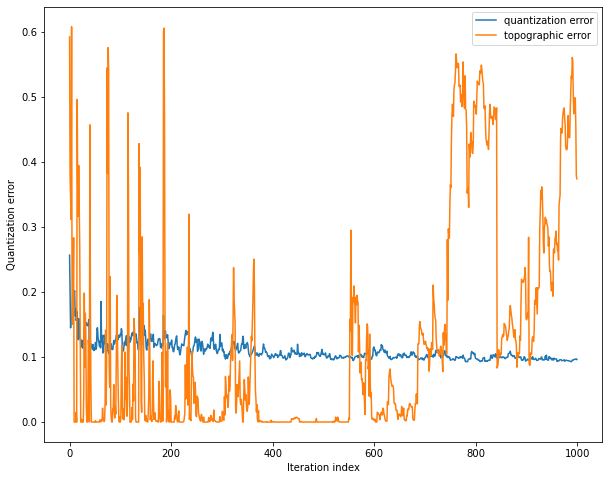

In [30]:
max_iter = 1000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(data))
    som.update(data[rand_i], som.winner(data[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(data))
    t_error.append(som.topographic_error(data))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('Quantization error')
plt.xlabel('Iteration index')
plt.legend()
plt.show()

In [31]:
X_scaled2.shape[1]

2

In [32]:
# Initialization and training
som_shape = (1,4)
som = MiniSom(som_shape[0], som_shape[1], X_scaled2.shape[1], sigma=1.0, learning_rate=.7,
              neighborhood_function='gaussian', random_seed=10)
som.train_batch(X_scaled2, 1000, verbose=True)

C:\Users\Hp\anaconda3\lib\site-packages\minisom.py:154: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


 [  615 / 1000 ]  62% - 0:00:00 left 

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.09780676069185822


In [33]:
som = MiniSom(4,1,2,sigma=1.0,learning_rate=0.7,random_seed=10)

In [34]:
som.random_weights_init(X_scaled2)

In [35]:
som.train_batch(X_scaled2, 500)

In [36]:
np.save('weight_som.txt', som.get_weights)

In [37]:
starting_weights = som.get_weights()

In [38]:
starting_weights

array([[[0.09525752, 0.18162381]],

       [[0.06194827, 0.45087471]],

       [[0.31304858, 0.31172931]],

       [[0.10180382, 0.69383189]]])

In [39]:
som._weights

array([[[0.09525752, 0.18162381]],

       [[0.06194827, 0.45087471]],

       [[0.31304858, 0.31172931]],

       [[0.10180382, 0.69383189]]])

In [40]:
som.distance_map()

array([[0.37489186],
       [0.77157895],
       [1.        ],
       [0.60331291]])

In [41]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in X_scaled2]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, (4,1))

In [43]:
#import matplotlib.pyplot as plt
#%matplotlib inline

# plotting the clusters using the first 2 dimentions of the data
#for c in np.unique(cluster_index):
    #plt.scatter(X_scaled2[cluster_index == c, 1],
                #X_scaled2[cluster_index == c, 0], label='cluster='+str(c), alpha=.7)

# plotting centroids
#for centroid in starting_weights():
    #plt.scatter(centroid.iloc[:, 1], centroid.iloc[:, 0], marker='x', 
                #s=80, linewidths=35, color='k', label='centroid')
#plt.legend();

IndentationError: unexpected indent (Temp/ipykernel_9008/3861935153.py, line 6)

In [ ]:
som.get

In [44]:
print('QE:', som.quantization_error(X_scaled2))
print('TE:', som.topographic_error(X_scaled2))

QE: 0.10020924246309604
TE: 0.6355525051475635


In [45]:
print(winner_coordinates)

[[3 3 0 ... 1 1 2]
 [0 0 0 ... 0 0 0]]


In [46]:
som_silhouette = silhouette_score(
    X_scaled2, cluster_index
    ).round(2)

In [47]:
som_silhouette

0.49

In [48]:
print(cluster_index)

[3 3 0 ... 1 1 2]


In [49]:
frame2 = pd.DataFrame(gempa)

In [50]:
frame2['som'] = cluster_index
frame2['som'].value_counts()

1    736
3    339
0    252
2    130
Name: som, dtype: int64

In [51]:
frame2

,mag,depth,som
0,5.00,59.84,3
1,5.10,64.77,3
2,5.86,8.00,0
3,5.00,59.39,3
4,5.20,61.14,3
...,...,...,...
1452,5.20,50.00,3
1453,5.70,68.00,3
1454,5.00,33.00,1
1455,5.53,33.00,1


In [52]:
frame2['som'] = frame2['som'].replace(to_replace=0, value = 'a')
frame2['som'] = frame2['som'].replace(to_replace=1, value = 'b')
frame2['som'] = frame2['som'].replace(to_replace=2, value = 'c')
frame2['som'] = frame2['som'].replace(to_replace=3, value = 'd')

In [53]:
frame2['som'] = frame2['som'].replace(to_replace='a', value = 1)
frame2['som'] = frame2['som'].replace(to_replace='b', value = 2)
frame2['som'] = frame2['som'].replace(to_replace='c', value = 3)
frame2['som'] = frame2['som'].replace(to_replace='d', value = 4)

In [54]:
frame2.head(10)

,mag,depth,som
0,5.00,59.84,4
1,5.10,64.77,4
2,5.86,8.00,1
3,5.00,59.39,4
4,5.20,61.14,4
5,5.16,22.00,1
6,5.20,10.00,1
7,5.66,20.00,1
8,5.40,17.35,1
9,5.10,40.30,2


In [55]:
frame2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1456
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mag     1457 non-null   float64
 1   depth   1457 non-null   float64
 2   som     1457 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 45.5 KB


In [56]:
print(frame2['som'].value_counts())

2    736
4    339
1    252
3    130
Name: som, dtype: int64


In [57]:
C1 = frame2[frame2["som"] == 1]
C2 = frame2[frame2["som"] == 2]
C3 = frame2[frame2["som"] == 3]
C4 = frame2[frame2["som"] == 4]

In [58]:
C1[["mag","depth"]].describe()

,mag,depth
count,252.000000,252.000000
mean,5.303373,16.176667
std,0.255780,5.670477
min,5.000000,3.900000
25%,5.100000,10.000000
50%,5.260000,17.200000
75%,5.460000,21.525000
max,6.150000,25.000000


In [59]:
C2[["mag","depth"]].describe()

,mag,depth
count,736.000000,736.000000
mean,5.221386,32.500734
std,0.217878,3.779456
min,5.000000,24.400000
25%,5.070000,30.000000
50%,5.160000,33.000000
75%,5.360000,35.000000
max,5.900000,42.500000


In [60]:
C3[["mag","depth"]].describe()

,mag,depth
count,130.000000,130.000000
mean,6.312308,26.376923
std,0.549858,6.346195
min,5.660000,9.000000
25%,5.960000,21.250000
50%,6.150000,26.000000
75%,6.547500,33.000000
max,8.920000,38.000000


In [61]:
C4[["mag","depth"]].describe()

,mag,depth
count,339.000000,339.000000
mean,5.259882,54.427375
std,0.285172,7.907064
min,5.000000,40.000000
25%,5.070000,47.100000
50%,5.200000,54.000000
75%,5.380000,59.870000
max,6.850000,70.000000


In [62]:
data = np.array(frame2)

#### Visualisasi

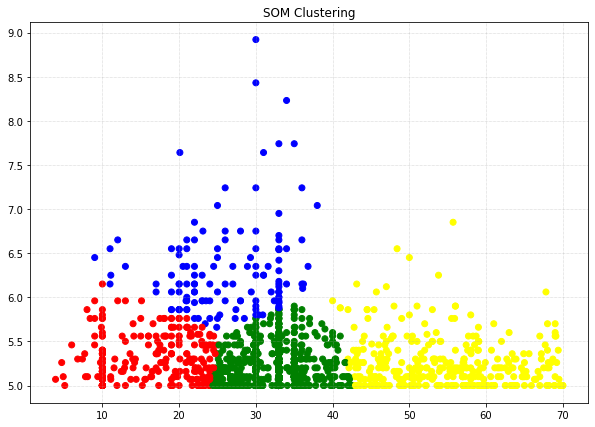

In [63]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Plot the results
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
x = data[:,1]
y = data[:,0]
colors = ['red', 'green', 'blue', 'yellow']

ax.scatter(x, y, c=frame2.som, cmap=ListedColormap(colors))
ax.title.set_text('SOM Clustering')

In [64]:
import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Text(0, 0.5, 'Magnitudo (mb)')

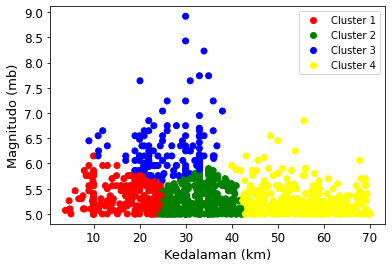

In [65]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

x = data[:,1]
y = data[:,0]

classes = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
values = frame2.som
colors = ListedColormap(['red','green','blue','yellow'])
scatter = plt.scatter(x, y, c=values, cmap=colors)
#plt.title('SOM Clustering')
#plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.xlabel('Kedalaman (km)', size = 13)
plt.ylabel('Magnitudo (mb)', size = 13)

<AxesSubplot:title={'center':'Silhouette Analysis'}, xlabel='Silhouette coefficient values', ylabel='Cluster label'>

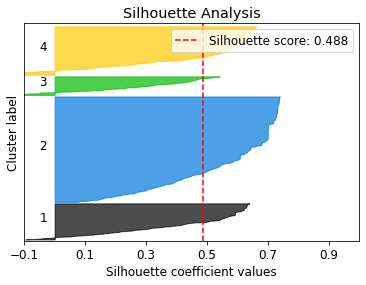

In [66]:
import scikitplot as skplt

skplt.metrics.plot_silhouette(X_scaled2, frame2.som)

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(som, colors='yellowbrick')

visualizer.fit(X_scaled2)        # Fit the data to the visualizer
visualizer.show() 

In [ ]:
datasom = pd.concat([df,frame2], axis=1)
datasom

In [ ]:
datasom = datasom.rename(columns = {'som':'cluster'})

In [ ]:
import folium
from folium import plugins
from folium.plugins import MarkerCluster

In [ ]:
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.cm import rainbow

In [ ]:
data = np.array(datasom)

In [ ]:
datasom.info()

In [ ]:
# point_layer name list
all_gp = []
for x in range(len(data)):
    pg = data[x][7]
    all_gp.append(pg)

In [ ]:
# Create point_layer object
unique_gp = list(set(all_gp))
vlist = []
for i,k in enumerate(unique_gp):
    locals()[f'point_layer{i}'] = folium.FeatureGroup(name=k)
    vlist.append(locals()[f'point_layer{i}'])

In [ ]:
unique_gp

In [ ]:
# Creating list for point_layer
pl_group = []
for n in all_gp:
    for v in vlist: 
        if n == vars(v)['layer_name']:
            pl_group.append(v)

In [ ]:
# point_layer name list
all_gp = []
for x in range(len(data)):
    pg = data[x][7]
    all_gp.append(pg)

# Create point_layer object
unique_gp = list(set(all_gp))
vlist = []
for i,k in enumerate(unique_gp):
    locals()[f'point_layer{i}'] = folium.FeatureGroup(name=k)
    vlist.append(locals()[f'point_layer{i}'])
    
# Creating list for point_layer
pl_group = []
for n in all_gp:
    for v in vlist: 
        if n == vars(v)['layer_name']:
            pl_group.append(v)

In [ ]:
map_clust = folium.Map(location=[datasom.latitude.mean(), datasom.longitude.mean()], tiles='OpenStreetMap',zoom_start=9)

# get a colour
#colormap = cm.StepColormap(colors=['red','green','blue','yellow'] 

def color_producer(cluster):
    if cluster == 1:
        col = 'red'
    elif cluster == 2:
        col = 'green'
    elif cluster == 3:
        col = 'blue'
    else:
        col = 'yellow'
    return col

# point_layer name list
all_gp = []
for x in range(len(data)):
    pg = data[x][7]
    all_gp.append(pg)

# Create point_layer object
unique_gp = list(set(all_gp))
vlist = []
for i,k in enumerate(unique_gp):
    locals()[f'point_layer{i}'] = folium.FeatureGroup(name=k)
    vlist.append(locals()[f'point_layer{i}'])
    
# Creating list for point_layer
pl_group = []
for n in all_gp:
    for v in vlist: 
        if n == vars(v)['layer_name']:
            pl_group.append(v)

for (lat, lng, place, cluster, pg) in zip(datasom['latitude'],datasom['longitude'],datasom['place'],datasom['cluster'], pl_group):
    folium.vector_layers.CircleMarker(
        [lat, lng], radius=3,
        popup=str(place)+ '- Cluster ' + str(cluster),
        tooltip = str(place)+ '- Cluster ' + str(cluster),
        color = color_producer(cluster),
        fill=True,
        fill_color=color_producer(cluster),
        fill_opacity=0.9).add_to(pg)
    pg.add_to(map_clust)
    
map_clust.add_child(folium.LayerControl(collapsed=False)) 

map_clust

In [ ]:
datasom.head(10)

In [ ]:
datasom.tail(7)

In [ ]:
datasom.to_csv(r'C:\Users\Hp\DataSOMKluster.csv', index = False, header=True)

In [ ]:
finaldata = coba[['mag','depth','k-means','som']]

In [ ]:
finaldata

In [ ]:
#finaldata.to_csv(r'C:\Users\Hp\DataFinalKluster.csv', index = False, header=True)

In [ ]:
datafix = pd.concat([finaldata, df[['latitude','longitude']]], axis=1)

In [ ]:
datafix

In [ ]:
#datafix.to_csv(r'C:\Users\Hp\DataFix.csv', index = False, header=True)

In [ ]:
data_final = pd.merge(frame, frame2)

In [ ]:
data_final

In [ ]:
data_final.shape

### Sklearn SOM

In [ ]:
pip install sklearn-som

In [ ]:
from sklearn_som.som import SOM

In [ ]:
somm = SOM(m=2, n=1, dim=2)
somm.fit(X_scaled2)

In [ ]:
pred = somm.predict(X_scaled2)

In [ ]:
pred

In [ ]:
# Plot the results
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,7))
x = iris_data[:,0]
y = iris_data[:,1]
colors = ['red', 'green', 'blue']

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets

from sklearn_som.som import SOM

# Load iris data
iris = datasets.load_iris()
iris_data = iris.data
iris_label = iris.target

# Extract just two features (just for ease of visualization)
iris_data = iris_data[:, :2]

# Build a 3x1 SOM (3 clusters)
som = SOM(m=3, n=1, dim=2, random_state=1234)

# Fit it to the data
som.fit(iris_data)

# Assign each datapoint to its predicted cluster
predictions = som.predict(iris_data)

# Plot the results
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5,7))
x = iris_data[:,0]
y = iris_data[:,1]
colors = ['red', 'green', 'blue']

ax[0].scatter(x, y, c=iris_label, cmap=ListedColormap(colors))
ax[0].title.set_text('Actual Classes')
ax[1].scatter(x, y, c=predictions, cmap=ListedColormap(colors))
ax[1].title.set_text('SOM Predictions')

In [ ]:
from kneed import KneeLocator

In [ ]:
inertia = []
for i in range (1,31):
    som = SOM(m = 1, n = i, dim = x_lda_train.shape[1])
    som.fit_predict(x_lda_train)
    inertia.append(som.inertia_)
# identify the knee by using the kneelocator function
kneeloc1 = KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')
plt.plot(range(1,31), inertia)
plt.title('elbow method for SOM')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
# print it by using the vlines
plt.vlines(kneeloc1.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()
# you can see this also as just a number by printing it
print(kneeloc1.knee)